In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [2]:
# Carregar o dataset
file_path = r'C:\Users\USER\Desktop\Projeto Portfolio\udemy_courses.csv'
data = pd.read_csv(file_path)

In [6]:
# Filtrar e agrupar por categorias
categories = data['subject'].unique()
max_categories = len(categories)

In [7]:
# Simular usuários fictícios e suas inscrições com base nas categorias
np.random.seed(42)
num_users = 1000
user_ids = np.arange(1, num_users + 1)

In [8]:
# Cada usuário se inscreve entre 1 e max_categories categorias
user_transactions = []
for user_id in user_ids:
    num_user_categories = np.random.randint(1, max_categories + 1)
    user_categories = np.random.choice(categories, num_user_categories, replace=False)
    user_transactions.append(list(user_categories))

In [9]:
# Transformar os dados para One-Hot Encoding
te = TransactionEncoder()
te_ary = te.fit(user_transactions).transform(user_transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
# Aplicar o Algoritmo FP-Growth com suporte mínimo ajustado
frequent_itemsets = fpgrowth(df_transactions, min_support=0.01, use_colnames=True)
if frequent_itemsets.empty:
    print("Nenhum itemset frequente encontrado. Tente diminuir ainda mais o suporte mínimo.")
else:
    # Gerar regras de associação
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    
    # Verificar as colunas disponíveis em rules
    print("Colunas disponíveis em rules:", rules.columns)
    
    # Exibir todas as regras de associação
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Colunas disponíveis em rules: Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')
                                          antecedents  \
0                                    (Graphic Design)   
1                               (Musical Instruments)   
2                                    (Graphic Design)   
3                                   (Web Development)   
4               (Graphic Design, Musical Instruments)   
5                   (Graphic Design, Web Development)   
6              (Musical Instruments, Web Development)   
7                                    (Graphic Design)   
8                               (Musical Instruments)   
9                                   (Web Development)   
10                              (Musical Instruments)   
11                                 (Business Finance)   
12                                 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Ignorar avisos de depreciação

In [13]:
# Configurar o estilo do seaborn
sns.set(style="whitegrid")

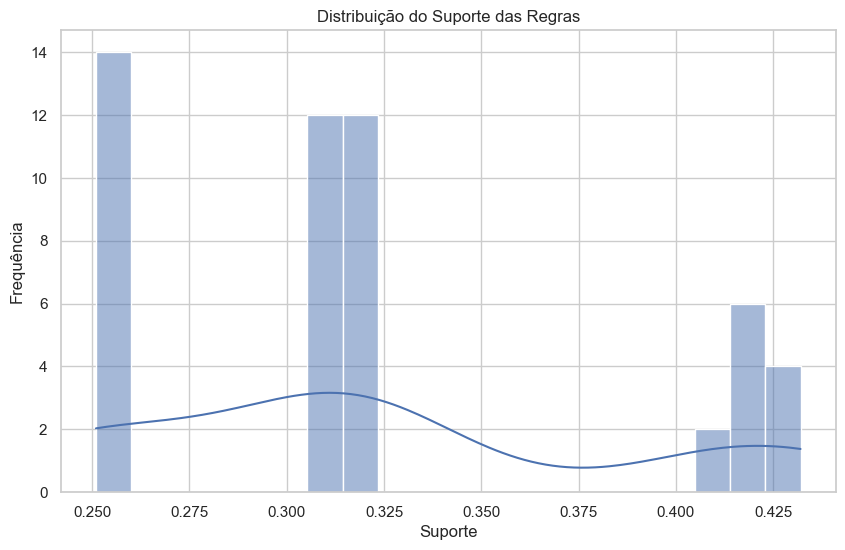

In [14]:
# Histograma do Suporte
plt.figure(figsize=(10, 6))
sns.histplot(rules['support'], bins=20, kde=True)
plt.title('Distribuição do Suporte das Regras')
plt.xlabel('Suporte')
plt.ylabel('Frequência')
plt.show()

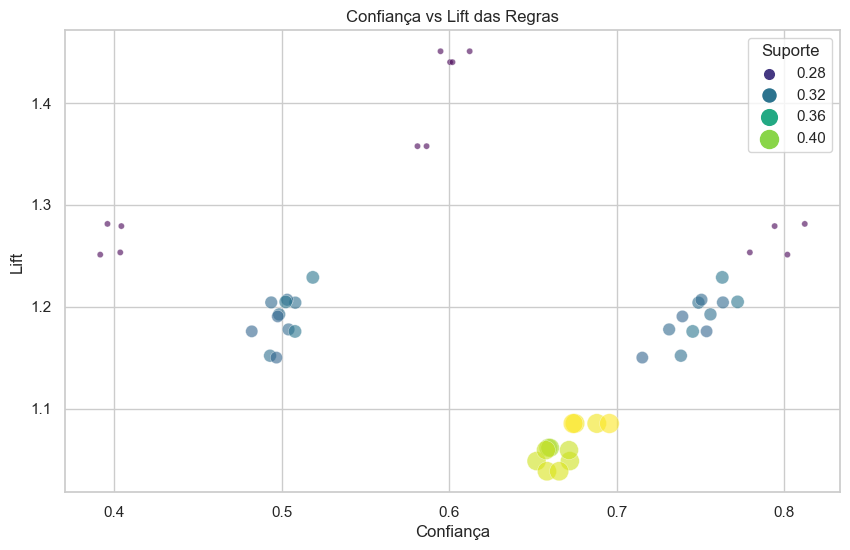

In [15]:
# Gráfico de Dispersão de Confiança vs Lift
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='confidence', y='lift', hue='support', size='support', sizes=(20, 200), alpha=0.6, palette='viridis')
plt.title('Confiança vs Lift das Regras')
plt.xlabel('Confiança')
plt.ylabel('Lift')
plt.legend(title='Suporte', loc='best')
plt.show()

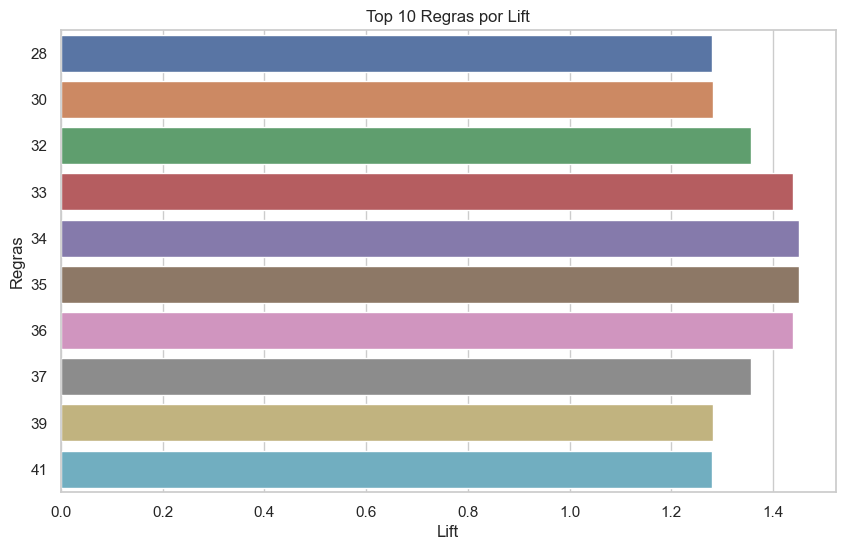

In [16]:
# Gráfico de Barras das Regras mais Fortes (Top 10 por Lift)
top_rules = rules.nlargest(10, 'lift')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_rules, x='lift', y=top_rules.index, orient='h')
plt.title('Top 10 Regras por Lift')
plt.xlabel('Lift')
plt.ylabel('Regras')
plt.show()